**Write a program to compare the performance of SGD, Adam, and RMSprop optimizers on a given
dataset.**

Step 1: Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Step 2: Generate Sample Data

In [12]:
# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1) / 1.5

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((100, 1)), X))


Step 3: Implement Optimizers

SGD Optimizer

In [14]:
def sgd(X, y, initial_params, learning_rate=0.01, n_iter=1000):
    params = np.array(initial_params, dtype=float)
    for _ in range(n_iter):
        for i in range(len(X)):
            prediction = np.dot(X[i], params)
            error = prediction - y[i]
            gradient = error * X[i]
            params -= learning_rate * gradient
    return params


Adam Optimizer

In [13]:
def adam(X, y, initial_params, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iter=1000):
    params = np.array(initial_params, dtype=float)
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    for _ in range(n_iter):
        for i in range(len(X)):
            prediction = np.dot(X[i], params)
            error = prediction - y[i]
            gradient = error * X[i]
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient**2
            m_hat = m / (1 - beta1)
            v_hat = v / (1 - beta2)
            params -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    return params


RMSprop Optimizer

In [15]:
def rmsprop(X, y, initial_params, learning_rate=0.01, decay_rate=0.9, epsilon=1e-8, n_iter=1000):
    params = np.array(initial_params, dtype=float)
    squared_grad = np.zeros_like(params)
    for _ in range(n_iter):
        for i in range(len(X)):
            prediction = np.dot(X[i], params)
            error = prediction - y[i]
            gradient = error * X[i]
            squared_grad = decay_rate * squared_grad + (1 - decay_rate) * gradient**2
            params -= learning_rate * gradient / (np.sqrt(squared_grad) + epsilon)
    return params


Step 4: Compare Optimizers

SGD MSE: 1.074599843181729
Adam MSE: 1.0773597443130243
RMSprop MSE: 1.0372047016394266


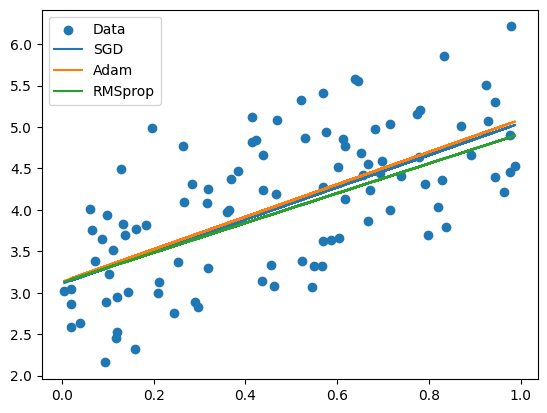

In [16]:
def mse(X, y, params):
    predictions = np.dot(X, params)
    return np.mean((predictions - y)**2)

# Initial parameters
initial_params = [0, 0]

# Run optimizers
sgd_params = sgd(X, y, initial_params)
adam_params = adam(X, y, initial_params)
rmsprop_params = rmsprop(X, y, initial_params)

# Calculate MSE for each optimizer
sgd_mse = mse(X, y, sgd_params)
adam_mse = mse(X, y, adam_params)
rmsprop_mse = mse(X, y, rmsprop_params)

print(f"SGD MSE: {sgd_mse}")
print(f"Adam MSE: {adam_mse}")
print(f"RMSprop MSE: {rmsprop_mse}")

# Plot predictions
plt.scatter(X[:, 1], y, label='Data')
plt.plot(X[:, 1], np.dot(X, sgd_params), label='SGD')
plt.plot(X[:, 1], np.dot(X, adam_params), label='Adam')
plt.plot(X[:, 1], np.dot(X, rmsprop_params), label='RMSprop')
plt.legend()
plt.show()
